**Loading data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
import sklearn

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#load data

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

**Basic EDA**

In [3]:
df_train.shape

(40000, 15)

In [4]:
df_test.shape

(10000, 14)

In [5]:
df_train.head()

id  song_duration_ms  acousticness  danceability    energy  \
0   0          212990.0      0.642286      0.856520  0.707073   
1   1               NaN      0.054866      0.733289  0.835545   
2   2          193213.0           NaN      0.188387  0.783524   
3   3          249893.0      0.488660      0.585234  0.552685   
4   4          165969.0      0.493017           NaN  0.740982   

   instrumentalness   key  liveness  loudness  audio_mode  speechiness  \
0          0.002001  10.0       NaN -5.619088           0     0.082570   
1          0.000996   8.0  0.436428 -5.236965           1     0.127358   
2         -0.002694   5.0  0.170499 -4.951759           0     0.052282   
3          0.000608   0.0  0.094805 -7.893694           0     0.035618   
4          0.002033  10.0  0.094891 -2.684095           0     0.050746   

        tempo  time_signature  audio_valence  song_popularity  
0  158.386236               4       0.734642                0  
1  102.752988               3       0.711531                1  
2  178.685791               3       0.425536                0  
3  128.715630               3       0.453597                0  
4  121.928157               4       0.741311                0

In [6]:
df_test.head()

id  song_duration_ms  acousticness  danceability    energy  \
0   0          308523.0      0.019845           NaN  0.908939   
1   1          200011.0      0.070119      0.731256  0.444655   
2   2          279758.0      0.810637      0.568858  0.125466   
3   3          249197.0           NaN      0.871789  0.557342   
4   4               NaN      0.765568      0.624687  0.710794   

   instrumentalness   key  liveness   loudness  audio_mode  speechiness  \
0          0.001438   NaN  0.112832  -8.890172           0     0.082714   
1          0.002020  10.0  0.139040  -6.301214           0     0.061685   
2          0.898841   0.0  0.226614 -11.542478           0     0.041868   
3          0.000715   4.0  0.325391  -7.905546           1     0.046815   
4          0.000346   8.0  0.308284        NaN           0     0.129284   

        tempo  time_signature  audio_valence  
0  126.129304               4       0.399620  
1   86.448149               3       0.499424  
2   99.544351               3       0.564951  
3  123.063854               4       0.906485  
4   88.703121               3       0.935571

In [7]:
np.sum(df_train.isnull())

id                     0
song_duration_ms    4101
acousticness        3992
danceability        4026
energy              3975
instrumentalness    3985
key                 4065
liveness            4086
loudness            3957
audio_mode             0
speechiness            0
tempo                  0
time_signature         0
audio_valence          0
song_popularity        0
dtype: int64

**Using SimpleIMputer from SKlearn for imputing data for missing values**

In [8]:
from sklearn.impute import SimpleImputer
imptr = SimpleImputer(strategy="median", add_indicator=False)

In [9]:
#Train data
imptr = imptr.fit(df_train[['song_duration_ms','acousticness','danceability','energy','instrumentalness','key','liveness','loudness']])
df_train[['song_duration_ms','acousticness','danceability','energy','instrumentalness','key','liveness','loudness']] = imptr.transform(df_train[['song_duration_ms','acousticness','danceability','energy','instrumentalness','key','liveness','loudness']])

In [10]:
#Test data
imptr = imptr.fit(df_test[['song_duration_ms','acousticness','danceability','energy','instrumentalness','key','liveness','loudness']])
df_test[['song_duration_ms','acousticness','danceability','energy','instrumentalness','key','liveness','loudness']] = imptr.transform(df_test[['song_duration_ms','acousticness','danceability','energy','instrumentalness','key','liveness','loudness']])

In [11]:
np.sum(df_train.isnull())

id                  0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
song_popularity     0
dtype: int64

In [12]:
np.sum(df_test.isnull())

id                  0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [13]:
df_train.describe()

id  song_duration_ms  acousticness  danceability  \
count  40000.00000      40000.000000  40000.000000  40000.000000   
mean   19999.50000     192498.835550      0.262844      0.574704   
std    11547.14972      43454.439076      0.285589      0.180543   
min        0.00000      25658.000000     -0.013551      0.043961   
25%     9999.75000     168547.250000      0.047767      0.446234   
50%    19999.50000     186660.000000      0.140532      0.608234   
75%    29999.25000     210644.750000      0.430693      0.707008   
max    39999.00000     491671.000000      1.065284      0.957131   

             energy  instrumentalness           key      liveness  \
count  40000.000000      40000.000000  40000.000000  40000.000000   
mean       0.685971          0.033084      5.038275      0.192122   
std        0.201912          0.142730      3.196782      0.144958   
min       -0.001682         -0.004398      0.000000      0.027843   
25%        0.561605          0.001069      2.000000      0.114240   
50%        0.704453          0.001974      5.000000      0.135945   
75%        0.859175          0.003047      8.000000      0.200432   
max        1.039741          1.075415     11.000000      1.065298   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  40000.000000  40000.000000  40000.000000  40000.000000    40000.000000   
mean      -7.302520      0.321150      0.094107    116.562815        3.394375   
std        3.694061      0.466924      0.083591     26.167911        0.524405   
min      -32.117911      0.000000      0.015065     62.055779        2.000000   
25%       -9.090920      0.000000      0.038500     96.995309        3.000000   
50%       -6.345413      0.000000      0.055881    113.795959        3.000000   
75%       -4.788085      1.000000      0.118842    128.517383        4.000000   
max       -0.877346      1.000000      0.560748    219.163578        5.000000   

       audio_valence  song_popularity  
count   40000.000000     40000.000000  
mean        0.580645         0.364400  
std         0.237351         0.481268  
min         0.013398         0.000000  
25%         0.398669         0.000000  
50%         0.598827         0.000000  
75%         0.759635         1.000000  
max         1.022558         1.000000

In [14]:
df_train.audio_mode.value_counts()

0    27154
1    12846
Name: audio_mode, dtype: int64

In [15]:
df_train.time_signature.value_counts()

3    23358
4    15919
2      530
5      193
Name: time_signature, dtype: int64

**audio mode and time signature are categorical values, they will be handled later using Encoding**

In [16]:
df_train.song_popularity.value_counts()
#0 -- not popular
#1 -- popular

0    25424
1    14576
Name: song_popularity, dtype: int64

In [17]:
pop = df_train[df_train['song_popularity'] == 1]
not_pop = df_train[df_train['song_popularity'] == 0]

print("Percentage of Songs popular", len(pop['song_popularity']) * 100 / len(df_train))
print("Percentage of Songs not popular", len(not_pop['song_popularity']) * 100 / len(df_train))

Percentage of Songs popular 36.44
Percentage of Songs not popular 63.56


<AxesSubplot:>

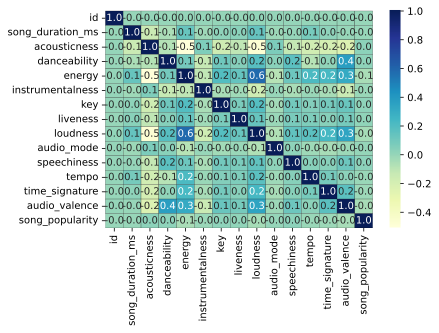

In [18]:
corr = df_train.corr()
sns.heatmap(corr,
            fmt='.1f',
            linewidth=0.2,
            linecolor='black',
            annot = True,
            cmap="YlGnBu" 
            )

**Positive corr**

loudness and energy = 0.6

loudness and audio_valence = 0.4

danceability and audio_valence = 0.4

**Negative corr**

acousticness and energy = -0.6

acousticness and loudness = -0.5

**plotting highly coorelated attributes**

In [88]:
plt.scatter(df_train.loudness,df_train.energy)
sns.set_style("whitegrid")

In [ ]:
plt.scatter(df_train.energy,df_train.acousticness)
sns.set_style("whitegrid")

In [21]:
plt.scatter(df_train.loudness,df_train.acousticness)
sns.set_style("whitegrid")

In [22]:
#testing low coorelated values
plt.scatter(df_train.audio_valence,df_train.tempo)
sns.set_style("whitegrid")

In [23]:
df_train.dtypes
#audio_mode and time_signature are categorical
#other are continuous

id                    int64
song_duration_ms    float64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
song_popularity       int64
dtype: object

**Encoding both the values using "One-hot" encoder**

In [24]:
#train
df_train_encoded = pd.get_dummies(df_train, columns=["audio_mode", "time_signature"])

In [25]:
#test
df_test_encoded = pd.get_dummies(df_test, columns=["audio_mode", "time_signature"])

In [26]:
df_train_encoded.head(5)

id  song_duration_ms  acousticness  danceability    energy  \
0   0          212990.0      0.642286      0.856520  0.707073   
1   1          186660.0      0.054866      0.733289  0.835545   
2   2          193213.0      0.140532      0.188387  0.783524   
3   3          249893.0      0.488660      0.585234  0.552685   
4   4          165969.0      0.493017      0.608234  0.740982   

   instrumentalness   key  liveness  loudness  speechiness       tempo  \
0          0.002001  10.0  0.135945 -5.619088     0.082570  158.386236   
1          0.000996   8.0  0.436428 -5.236965     0.127358  102.752988   
2         -0.002694   5.0  0.170499 -4.951759     0.052282  178.685791   
3          0.000608   0.0  0.094805 -7.893694     0.035618  128.715630   
4          0.002033  10.0  0.094891 -2.684095     0.050746  121.928157   

   audio_valence  song_popularity  audio_mode_0  audio_mode_1  \
0       0.734642                0             1             0   
1       0.711531                1             0             1   
2       0.425536                0             1             0   
3       0.453597                0             1             0   
4       0.741311                0             1             0   

   time_signature_2  time_signature_3  time_signature_4  time_signature_5  
0                 0                 0                 1                 0  
1                 0                 1                 0                 0  
2                 0                 1                 0                 0  
3                 0                 1                 0                 0  
4                 0                 0                 1                 0

In [27]:
#dropping id column as they are not necessary for predicting
df_train = df_train_encoded.drop(['id'], axis = 1)

In [28]:
df_test = df_test_encoded.drop(['id'], axis = 1)

In [29]:
df_train.shape

(40000, 18)

In [30]:
df_test.shape

(10000, 17)

**checking distribution of data if they are normal, right or left skewed**

In [31]:
#sns.distplot(df_train['song_duration_ms'],rug=True,color='#38b000')

In [32]:
#sns.distplot(df_train['loudness'],rug=True,color='#38b000')

In [33]:
#sns.distplot(df_train['acousticness'],rug=True,color='#38b000')

In [34]:
#sns.distplot(df_train['danceability'],rug=True,color='#38b000')

In [35]:
#sns.distplot(df_train['energy'],rug=True,color='#38b000')

In [36]:
#sns.distplot(df_train['instrumentalness'],rug=True,color='#38b000')

skewed data will be handled later

**Using Random Forest, KNN and XGBoost to check on predictions, will be using the optimised algorithm later**

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
rf = RandomForestClassifier()

In [39]:
df_train

song_duration_ms  acousticness  danceability    energy  \
0              212990.0      0.642286      0.856520  0.707073   
1              186660.0      0.054866      0.733289  0.835545   
2              193213.0      0.140532      0.188387  0.783524   
3              249893.0      0.488660      0.585234  0.552685   
4              165969.0      0.493017      0.608234  0.740982   
...                 ...           ...           ...       ...   
39995          237799.0      0.140532      0.748942  0.511234   
39996          191119.0      0.067488      0.672830  0.889685   
39997          160879.0      0.877431      0.409065  0.292671   
39998          193918.0      0.140532      0.365738  0.704453   
39999          196475.0      0.007116      0.354585  0.994883   

       instrumentalness   key  liveness   loudness  speechiness       tempo  \
0              0.002001  10.0  0.135945  -5.619088     0.082570  158.386236   
1              0.000996   8.0  0.436428  -5.236965     0.127358  102.752988   
2             -0.002694   5.0  0.170499  -4.951759     0.052282  178.685791   
3              0.000608   0.0  0.094805  -7.893694     0.035618  128.715630   
4              0.002033  10.0  0.094891  -2.684095     0.050746  121.928157   
...                 ...   ...       ...        ...          ...         ...   
39995          0.002913   0.0  0.173803  -8.853673     0.078060  168.262924   
39996          0.001225   5.0  0.122924  -7.798993     0.188607  110.684544   
39997          0.001974  10.0  0.110664 -15.378585     0.031294   99.556074   
39998          0.000339   1.0  0.356308  -4.661977     0.054096  139.857384   
39999          0.002191   1.0  0.200900  -4.875249     0.080549  101.974949   

       audio_valence  song_popularity  audio_mode_0  audio_mode_1  \
0           0.734642                0             1             0   
1           0.711531                1             0             1   
2           0.425536                0             1             0   
3           0.453597                0             1             0   
4           0.741311                0             1             0   
...              ...              ...           ...           ...   
39995       0.178159                0             1             0   
39996       0.790626                0             1             0   
39997       0.177947                1             1             0   
39998       0.772978                0             0             1   
39999       0.588549                0             1             0   

       time_signature_2  time_signature_3  time_signature_4  time_signature_5  
0                     0                 0                 1                 0  
1                     0                 1                 0                 0  
2                     0                 1                 0                 0  
3                     0                 1                 0                 0  
4                     0                 0                 1                 0  
...                 ...               ...               ...               ...  
39995                 0                 1                 0                 0  
39996                 0                 1                 0                 0  
39997                 0                 1                 0                 0  
39998                 0                 1                 0                 0  
39999                 0                 1                 0                 0  

[40000 rows x 18 columns]

In [40]:
X = df_train.copy()
#X_test = df_test.copy()

In [41]:
#X,y split
y = X['song_popularity']
X = X.drop('song_popularity', axis=1)

In [42]:
X.shape

(40000, 17)

In [43]:
X.head()

song_duration_ms  acousticness  danceability    energy  instrumentalness  \
0          212990.0      0.642286      0.856520  0.707073          0.002001   
1          186660.0      0.054866      0.733289  0.835545          0.000996   
2          193213.0      0.140532      0.188387  0.783524         -0.002694   
3          249893.0      0.488660      0.585234  0.552685          0.000608   
4          165969.0      0.493017      0.608234  0.740982          0.002033   

    key  liveness  loudness  speechiness       tempo  audio_valence  \
0  10.0  0.135945 -5.619088     0.082570  158.386236       0.734642   
1   8.0  0.436428 -5.236965     0.127358  102.752988       0.711531   
2   5.0  0.170499 -4.951759     0.052282  178.685791       0.425536   
3   0.0  0.094805 -7.893694     0.035618  128.715630       0.453597   
4  10.0  0.094891 -2.684095     0.050746  121.928157       0.741311   

   audio_mode_0  audio_mode_1  time_signature_2  time_signature_3  \
0             1             0                 0                 0   
1             0             1                 0                 1   
2             1             0                 0                 1   
3             1             0                 0                 1   
4             1             0                 0                 0   

   time_signature_4  time_signature_5  
0                 1                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 1                 0

In [44]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: song_popularity, dtype: int64

In [45]:
df_test.shape

(10000, 17)

In [46]:
#Scaling data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

col = X.columns
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = col


col = df_test.columns
df_test = pd.DataFrame(scaler.fit_transform(df_test))
df_test.columns = col

<AxesSubplot:xlabel='loudness', ylabel='Density'>

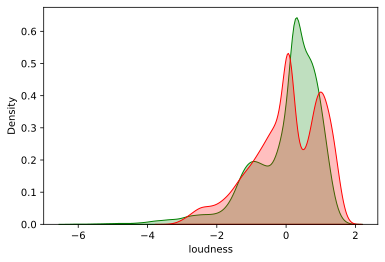

In [47]:
sns.kdeplot(df_test.loudness, shade=True,color="g")
sns.kdeplot(df_test.energy, shade=True,color="r")

<AxesSubplot:xlabel='acousticness', ylabel='Density'>

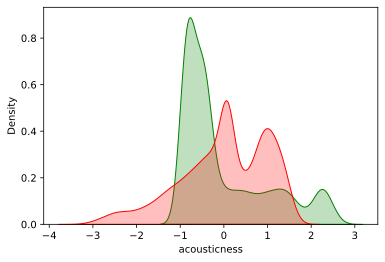

In [48]:
sns.kdeplot(df_test.acousticness, shade=True,color="g")
sns.kdeplot(df_test.energy, shade=True,color="r")

In [49]:
#Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 17), (16000, 17), (24000,), (16000,))

**Using Random Forest**

In [51]:
#fitting on training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
rf.score(X_train, y_train)

1.0

In [53]:
#this cannot be ran as we don't have y_test - in the Test data, we do not have the target variable
rf.score(X_test, y_test)

0.63025

In [54]:
#now prdicting the RF model on the X_train features
pred_y_train_rf = rf.predict(X_train)

In [55]:
#now prdicting the RF model on the X_test features
pred_y_test_rf = rf.predict(X_test)

In [56]:
metrics.accuracy_score(pred_y_train_rf, y_train)

1.0

In [57]:
metrics.accuracy_score(pred_y_test_rf, y_test)

0.63025

In [58]:
#print('Random Forest R2 Score', metrics.r2_score(y_train,rf.predict(X_train)))
#print('Random Forest OOB Score',rf.oob_score_ )

In [59]:
print('AUC scores on the training set: ', cross_val_score(rf, X_train,y_train, cv=5, scoring='roc_auc'),
      'Mean of AUC scores: ', np.mean(cross_val_score(rf, X_train,y_train, cv=5, scoring='roc_auc')))

AUC scores on the training set:  [0.55266353 0.54022487 0.55920798 0.5545787  0.54479433] Mean of AUC scores:  0.5473536056505963


In [60]:
print('AUC scores on the training set: ', cross_val_score(rf, X_train,pred_y_train_rf, cv=5, scoring='roc_auc'),
      'Mean of AUC scores: ', np.mean(cross_val_score(rf, X_train,pred_y_train_rf, cv=5, scoring='roc_auc')))

AUC scores on the training set:  [0.56193097 0.54484061 0.56696178 0.5546758  0.54725973] Mean of AUC scores:  0.5493020048751488


In [61]:
print('AUC scores on the test set: ', cross_val_score(rf, X_test,pred_y_test_rf, cv=5, scoring='roc_auc'),
      'Mean of AUC scores: ', np.mean(cross_val_score(rf, X_test,pred_y_test_rf, cv=5, scoring='roc_auc')))

AUC scores on the test set:  [0.83081145 0.85636175 0.80371116 0.80382921 0.81351693] Mean of AUC scores:  0.8203511628239081


In [62]:
actual_test_rf_preds = rf.predict(df_test)

In [63]:
actual_test_rf_preds.shape

(10000,)

In [64]:
print('AUC scores on the test set: ', cross_val_score(rf, df_test,actual_test_rf_preds, cv=5, scoring='roc_auc'),
      'Mean of AUC scores: ', np.mean(cross_val_score(rf, df_test,actual_test_rf_preds, cv=5, scoring='roc_auc')))

AUC scores on the test set:  [0.80327825 0.81077918 0.81038157 0.79807814 0.81467831] Mean of AUC scores:  0.8015359961544897


In [65]:
matrix = confusion_matrix(y_test, pred_y_test_rf, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[ 448 5371]
 [ 545 9636]]


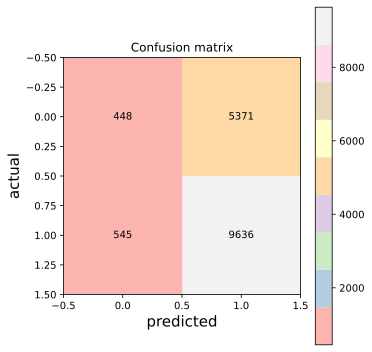

In [66]:
width = 2
height= 2
plt.figure(figsize=(5,5))
plt.imshow(matrix, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(10)
#plt.xticks(["0", "1"])
#plt.yticks(["0", "1"])
plt.tight_layout()
plt.ylabel('actual', size = 15)
plt.xlabel('predicted', size = 15)
width, height = matrix.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(matrix[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

In [67]:
print(classification_report(y_test, pred_y_test_rf,labels=[1,0]))
#1 -- Popular
#0 -- Not popular

              precision    recall  f1-score   support

           1       0.45      0.08      0.13      5819
           0       0.64      0.95      0.77     10181

    accuracy                           0.63     16000
   macro avg       0.55      0.51      0.45     16000
weighted avg       0.57      0.63      0.53     16000



**Using XGBoost**

In [68]:
from xgboost import XGBClassifier
from sklearn import model_selection
clf = XGBClassifier()

In [69]:
clf.fit(X_train, y_train)

[19:45:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
clf.score(X_test, y_test)

0.605

In [71]:
pred_y_test_clf = clf.predict(X_test)

In [72]:
actual_test_clf_preds = clf.predict(df_test)

In [73]:
print('AUC scores on the test set: ', cross_val_score(clf, df_test,actual_test_clf_preds, cv=5, scoring='roc_auc'),
      'Mean of AUC scores: ', np.mean(cross_val_score(clf, df_test,actual_test_clf_preds, cv=5, scoring='roc_auc')))

[19:45:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:45:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:45:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:45:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [74]:
matrix = confusion_matrix(y_test, pred_y_test_clf, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[ 961 4858]
 [1462 8719]]


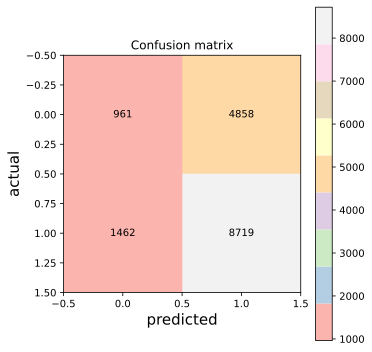

In [75]:
width = 2
height= 2
plt.figure(figsize=(5,5))
plt.imshow(matrix, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(10)
#plt.xticks(["0", "1"])
#plt.yticks(["0", "1"])
plt.tight_layout()
plt.ylabel('actual', size = 15)
plt.xlabel('predicted', size = 15)
width, height = matrix.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(matrix[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

In [76]:
#from sklearn.neighbors import KNeighborsClassifier

In [77]:
#knn = KNeighborsClassifier(n_neighbors=5)

In [78]:
#knn.fit(X_train, y_train)

In [79]:
#pred_y_test_knn = knn.predict(X_test)

In [80]:
#print('AUC scores on the training set: ', cross_val_score(knn, X_train,y_train, cv=5, scoring='roc_auc'),
#     'Mean of AUC scores: ', np.mean(cross_val_score(knn, X_train,y_train, cv=5, scoring='roc_auc')))

In [81]:
#print('AUC scores on the test set: ', cross_val_score(rf, X_test,pred_y_test_knn, cv=5, scoring='roc_auc'),
#      'Mean of AUC scores: ', np.mean(cross_val_score(rf, X_test,pred_y_test_knn, cv=5, scoring='roc_auc')))

**Submission** ::
Random Forest and XGBoost seems to be providing the best scores **~.54**

Random Forest AUC on X_Test is **0.83** which is good, hence submitting for the same. Will be working further on XGBoost

In [82]:
#sample_submission = pd.read_csv('../input/song-popularity-prediction/sample_submission.csv')

In [83]:
#sample_submission.shape

In [84]:
#sample_submission.head(5)

In [85]:
#output = pd.DataFrame({'id': sample_submission.index,
#                       'song_popularity': actual_test_rf_preds})

In [86]:
#output

In [87]:
#output.to_csv('./submission.csv', index=False)